<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/modelos2_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


## **Explicación de las pruebas a realizar**

En principio se imputaron todas las variables que podrían servir para este proyecto. Esto se hizo con el fin de probar todos los modelos posibles  que permiten resolver el problema. Como el dataset ya tenía faltantes, sobre todo en lo que tiene que ver con los resultados de laboratorio, se podría haber aprovechado esto para hacer las pruebas por etapas, pero limita la cantidad de modelos a utilizar, ya que algunos no soportan faltantes. Según los resultados que se obtengan y los modelos que mejor funcionan, se podría realizar esta prueba o no.

Como primera etapa, se entrenarán los modelos con el dataset completo. Según los resultados obtenidos, se procederá a realizar las pruebas por etapas, es decir, entrenamiento con parte del dataset (datos básicos del paciente) y después con el dataset completo.

In [3]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,act_vigorosa,...,act_moderada_9.0,prediabetes_glucosa_alterada_2.0,prediabetes_glucosa_alterada_3.0,prediabetes_glucosa_alterada_9.0,ACV_2,ACV_9,colesterol_alto_2.0,colesterol_alto_9.0,riñones_debiles_fallando_2.0,riñones_debiles_fallando_9.0
0,0.252775,1,0.836629,-0.748731,0.196637,0.547785,0.950983,1,-0.455568,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.541345,0.316824,1.472516,1.638509,0.256324,1,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.434103,1,-1.184465,0.695195,-0.744743,-0.095810,1.288207,0,-0.455568,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517088,-0.239514,0.123914,0.168128,-0.065207,0,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.366015,1,0.350266,0.447201,-0.745748,-0.982146,1.606888,0,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,act_vigorosa,...,act_moderada_9.0,prediabetes_glucosa_alterada_2.0,prediabetes_glucosa_alterada_3.0,prediabetes_glucosa_alterada_9.0,ACV_2,ACV_9,colesterol_alto_2.0,colesterol_alto_9.0,riñones_debiles_fallando_2.0,riñones_debiles_fallando_9.0
0,-0.422269,1,-0.356620,-0.493765,0.273615,-0.209254,1.140880,0,-0.455568,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136219,0.754733,0.060190,-0.128435,0.371970,1,2.364585,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.491089,0,-2.061674,-0.576858,-1.404786,-0.304637,-0.744758,1,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.096581,0,-1.827049,0.927919,-1.339257,-1.211241,0.091300,1,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276625,-0.661818,0.809700,-0.689028,1.871296,0,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   bmi                                    4454 non-null   float64
 7   fumo_100_cigarrillos                   4454 non-null   int64  
 8   fumador_actual                         4454 non-null   float64
 9   act_vigorosa                           4454 non-null   int64  
 10  realiza_actividad_intensidad_moderada  4454 non-null   int64  
 11  hora

In [6]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

la glicohemoglobina no es de rutina. Normalmente se piden glucosa (es barata y básica), pero la glicohemoglobina solo se le pide a quienes ya se sospecha que son diabéticos o para control de tratamiento, por lo que se evitará usar este valor.

Si bien, en los test anova, información mutua dan una idea de que variables se podrían usar, también se tendrá en cuenta el hecho de que algunas pueden representar casi lo mismo, por lo que se elegirá una u otra.

In [7]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

# columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
#                        'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
#                        'colesterol_alto_9.0', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
#                        'glicohemoglobina','fumo_100_cigarrillos','realiza_actividad_intensidad_moderada',
#                        'consumo_excesivo_alcohol_ultimo_año']

columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
                       'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
                       'colesterol_alto_9.0','fumador_actual', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
                       'glicohemoglobina','realiza_actividad_intensidad_moderada',
                       'consumo_excesivo_alcohol_ultimo_año','act_vigorosa']

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   bmi                                    4454 non-null   float64
 7   fumo_100_cigarrillos                   4454 non-null   int64  
 8   horas_suenio                           4454 non-null   float64
 9   anhedonia                              4454 non-null   float64
 10  hemoglobina                            4454 non-null   float64
 11  crea

In [8]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [9]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} ====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    recall_gap = recall_train - recall_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")
    print(f"Recall gap: {recall_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap,
        "recall_gap": recall_gap
    }

In [10]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

Antes SMOTE:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    4032
1    2016
Name: count, dtype: int64

===== Random Forest + SMOTE ====
---- TRAIN ----
AUC: 0.9587
Recall: 0.9489
Precision: 0.6745
F1: 0.7885

---- TEST ----
AUC: 0.8451
Recall: 0.7619
Precision: 0.2564
F1: 0.3837

---- GAP (Train-Test) ----
AUC gap: 0.1135
Recall gap: 0.1870


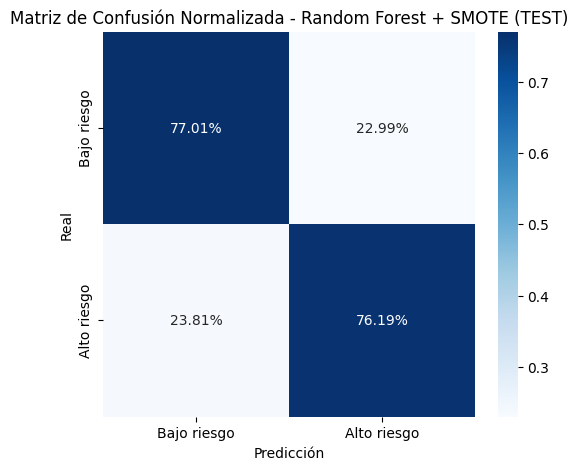


Métricas de Random Forest + SMOTE capturadas: {'auc_train': np.float64(0.958675462372449), 'recall_train': 0.9489087301587301, 'precision_train': 0.6745416078984485, 'f1_train': 0.7885408079142622, 'auc_test': np.float64(0.8451366274953985), 'recall_test': 0.7619047619047619, 'precision_test': 0.2564102564102564, 'f1_test': 0.38369304556354916, 'auc_gap': np.float64(0.11353883487705052), 'recall_gap': 0.18700396825396826}


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Oversampling
smote = SMOTE(
   sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)

# Capturamos las métricas devueltas por la función modificada
rf_smote_metrics = evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Random Forest + SMOTE"
)

# Opcional: imprimir las métricas capturadas para esta celda
print("\nMétricas de Random Forest + SMOTE capturadas:", rf_smote_metrics)
results.append({"Modelo": "Random Forest + SMOTE", **rf_smote_metrics})


===== XGBoost ====
---- TRAIN ----
AUC: 0.9551
Recall: 0.9633
Precision: 0.6307
F1: 0.7623

---- TEST ----
AUC: 0.8460
Recall: 0.8381
Precision: 0.2340
F1: 0.3659

---- GAP (Train-Test) ----
AUC gap: 0.1091
Recall gap: 0.1252


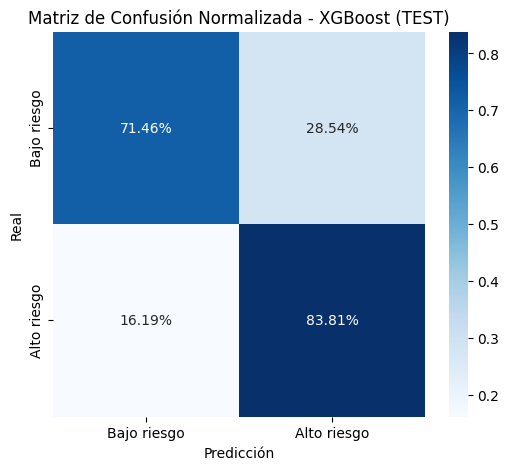

In [12]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
xgb_metrics = evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="XGBoost"
)

results.append({"Modelo": "XGBoost", **xgb_metrics})


===== CatBoost ====
---- TRAIN ----
AUC: 0.9811
Recall: 0.9940
Precision: 0.6312
F1: 0.7721

---- TEST ----
AUC: 0.8515
Recall: 0.8381
Precision: 0.2189
F1: 0.3471

---- GAP (Train-Test) ----
AUC gap: 0.1296
Recall gap: 0.1560


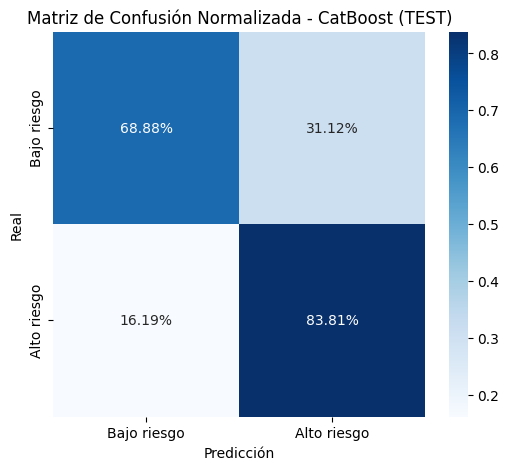

In [13]:
!pip install catboost
from catboost import CatBoostClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

modelo_cat = CatBoostClassifier(
    iterations=500,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    scale_pos_weight=ratio,
    verbose=0,
    random_state=42
)

modelo_cat.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
cat_metrics = evaluar_overfitting(
    modelo_cat,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="CatBoost"
)

results.append({"Modelo": "CatBoost", **cat_metrics})


===== Balanced RF ====
---- TRAIN ----
AUC: 0.9987
Recall: 1.0000
Precision: 0.3307
F1: 0.4971

---- TEST ----
AUC: 0.8474
Recall: 0.8000
Precision: 0.2478
F1: 0.3784

---- GAP (Train-Test) ----
AUC gap: 0.1513
Recall gap: 0.2000


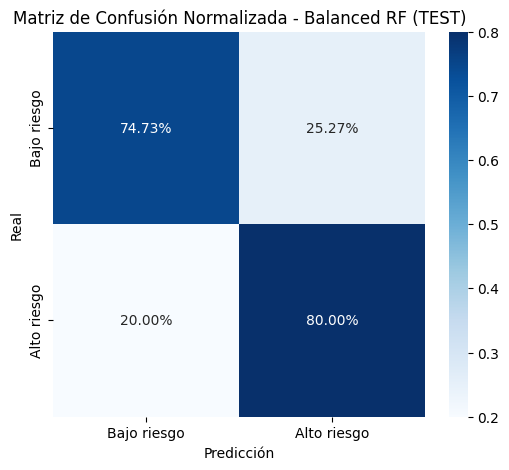

In [14]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

# Se capturan las métricas
brf_metrics = evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF"
)

results.append({"Modelo": "Balanced Random Forest", **brf_metrics})



===== Logistic Regression ====
---- TRAIN ----
AUC: 0.8878
Recall: 0.8815
Precision: 0.2557
F1: 0.3964

---- TEST ----
AUC: 0.8681
Recall: 0.8571
Precision: 0.2521
F1: 0.3896

---- GAP (Train-Test) ----
AUC gap: 0.0197
Recall gap: 0.0244


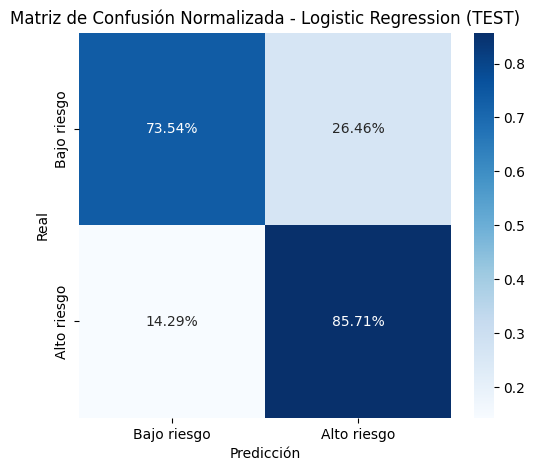

In [15]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000
)

modelo_lr.fit(X_train, y_train)

# Se capturan las métricas
lr_metrics = evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression"
)

results.append({"Modelo": "Logistic Regression", **lr_metrics})


===== Decision Tree Classifier ====
---- TRAIN ----
AUC: 0.8908
Recall: 0.9763
Precision: 0.2251
F1: 0.3659

---- TEST ----
AUC: 0.7602
Recall: 0.8000
Precision: 0.1854
F1: 0.3011

---- GAP (Train-Test) ----
AUC gap: 0.1306
Recall gap: 0.1763


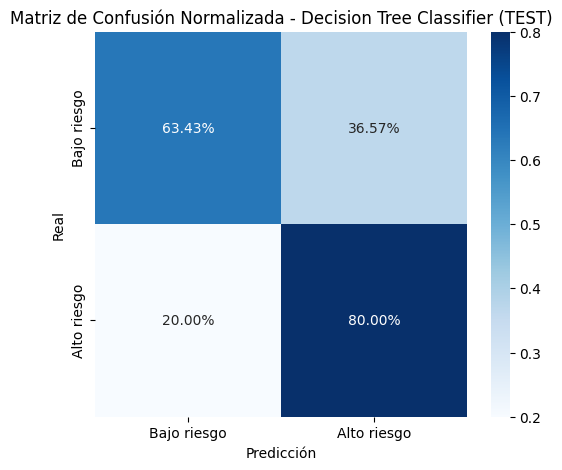

In [16]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

modelo_dt.fit(X_train, y_train)

# Se capturan las métricas
dt_metrics = evaluar_overfitting(
    modelo_dt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Decision Tree Classifier"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "Decision Tree Classifier", **dt_metrics})


===== SVM Linear Kernel ====
---- TRAIN ----
AUC: 0.8876
Recall: 0.3886
Precision: 0.4432
F1: 0.4141

---- TEST ----
AUC: 0.8671
Recall: 0.3524
Precision: 0.4568
F1: 0.3978

---- GAP (Train-Test) ----
AUC gap: 0.0204
Recall gap: 0.0362


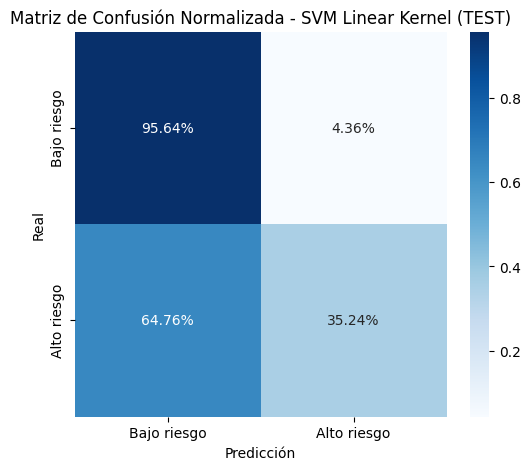

In [17]:
from sklearn.svm import SVC

modelo_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

modelo_svm.fit(X_train, y_train)

# Se capturan las métricas
svm_metrics = evaluar_overfitting(
    modelo_svm,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="SVM Linear Kernel"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "SVM Linear Kernel", **svm_metrics})


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   bmi                                    1114 non-null   float64
 7   fumo_100_cigarrillos                   1114 non-null   int64  
 8   horas_suenio                           1114 non-null   float64
 9   anhedonia                              1114 non-null   float64
 10  hemoglobina                            1114 non-null   float64
 11  crea

In [19]:
import pandas as pd

df_results = pd.DataFrame(results)

df_results

,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Random Forest + SMOTE,0.958675,0.948909,0.674542,0.788541,0.845137,0.761905,0.256410,0.383693,0.113539,0.187004
1,XGBoost,0.955123,0.963294,0.630724,0.762316,0.845977,0.838095,0.234043,0.365904,0.109146,0.125198
2,CatBoost,0.981080,0.994048,0.631181,0.772106,0.851498,0.838095,0.218905,0.347140,0.129582,0.155952
3,Balanced Random Forest,0.998746,1.000000,0.330721,0.497055,0.847435,0.800000,0.247788,0.378378,0.151311,0.200000
4,Logistic Regression,0.887826,0.881517,0.255670,0.396377,0.868101,0.857143,0.252101,0.389610,0.019725,0.024374
5,Decision Tree Classifier,0.890845,0.976303,0.225137,0.365897,0.760206,0.800000,0.185430,0.301075,0.130640,0.176303
6,SVM Linear Kernel,0.887561,0.388626,0.443243,0.414141,0.867120,0.352381,0.456790,0.397849,0.020442,0.036245


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    modelo_lr,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(scores.mean(), scores.std())


0.8772083593800474 0.016939839558115725


## **GRÁFICOS**

In [21]:
pip install shap

In [22]:
import shap
print("SHAP library imported successfully.")

SHAP library imported successfully.


### **RAMDOM FOREST**

In [23]:
explainer_rf_smote = shap.TreeExplainer(modelo_smote, X_train_sm)
print("SHAP TreeExplainer for Random Forest + SMOTE initialized.")

SHAP TreeExplainer for Random Forest + SMOTE initialized.


In [24]:
shap_values_rf_smote = explainer_rf_smote.shap_values(X_test)
print("SHAP values for Random Forest + SMOTE calculated.")

 99%|===================| 2209/2228 [00:27<00:00]       

SHAP values for Random Forest + SMOTE calculated.


Shape of shap_values_rf_smote: (1114, 32, 2)
Shape of X_test: (1114, 32)


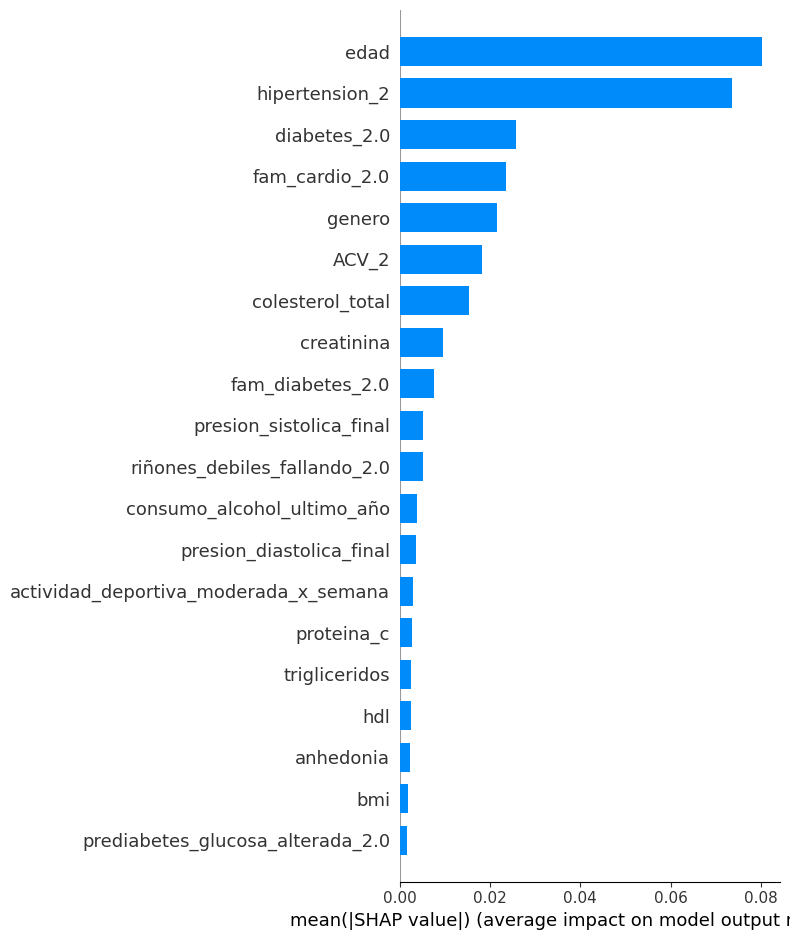

Global summary plot (bar type) for Random Forest + SMOTE generated.


In [25]:
print(f"Shape of shap_values_rf_smote: {shap_values_rf_smote.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Correctly slice for the SHAP values of the positive class (index 1) across all samples and features
shap.summary_plot(shap_values_rf_smote[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Random Forest + SMOTE generated.")

In [26]:
instance_to_explain_rf_smote = X_test.iloc[[0]]
shap_values_instance_rf_smote = explainer_rf_smote.shap_values(instance_to_explain_rf_smote)

print("Selected a specific instance from X_test for local explanation for Random Forest + SMOTE.")
print("SHAP values for the selected instance calculated.")

Selected a specific instance from X_test for local explanation for Random Forest + SMOTE.
SHAP values for the selected instance calculated.


In [27]:
shap.force_plot(explainer_rf_smote.expected_value[1], shap_values_instance_rf_smote[0, :, 1], instance_to_explain_rf_smote)
print("Local force plot for Random Forest + SMOTE generated.")

Local force plot for Random Forest + SMOTE generated.


### **CATBOOST**

In [28]:
explainer_cat = shap.TreeExplainer(modelo_cat, X_train_sm)
print("SHAP TreeExplainer for CatBoost initialized.")

SHAP TreeExplainer for CatBoost initialized.


In [29]:
shap_values_cat = explainer_cat.shap_values(X_test)
print("SHAP values for CatBoost calculated.")

 91%|==================  | 1018/1114 [00:15<00:01]       

SHAP values for CatBoost calculated.


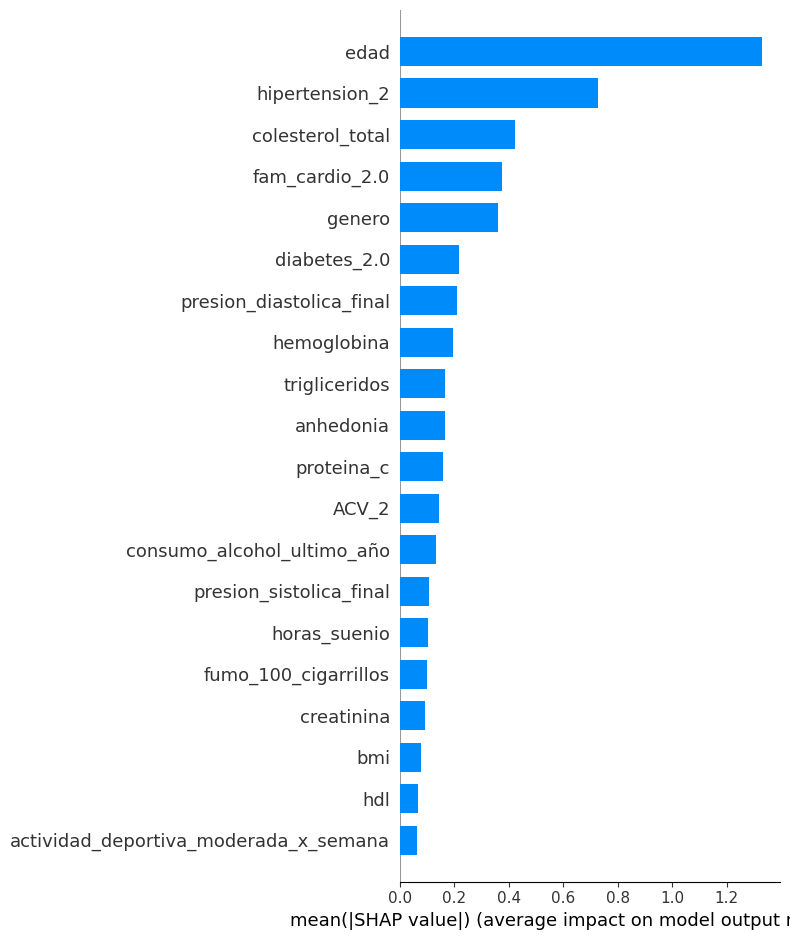

Global summary plot (bar type) for CatBoost generated.


In [30]:
shap.summary_plot(shap_values_cat, X_test, plot_type="bar")
print("Global summary plot (bar type) for CatBoost generated.")

In [31]:
instance_to_explain_cat = X_test.iloc[[0]]
shap_values_instance_cat = explainer_cat.shap_values(instance_to_explain_cat)

print("Selected a specific instance from X_test for local explanation for CatBoost.")
print("SHAP values for the selected instance calculated.")

Selected a specific instance from X_test for local explanation for CatBoost.
SHAP values for the selected instance calculated.


In [32]:
shap.force_plot(explainer_cat.expected_value, shap_values_instance_cat, instance_to_explain_cat)
print("Local force plot for CatBoost generated.")

Local force plot for CatBoost generated.


### **BALANCED RAMDOM FOREST**

In [33]:
explainer_brf = shap.TreeExplainer(modelo_brf, X_train)
print("SHAP TreeExplainer for Balanced Random Forest initialized.")

SHAP TreeExplainer for Balanced Random Forest initialized.


In [34]:
# Desactivamos check_additivity para evitar el error de precisión numérica
shap_values_brf = explainer_brf.shap_values(X_test, check_additivity=False)

print("SHAP values for Balanced Random Forest calculated (ignoring additivity gap).")

100%|===================| 2221/2228 [03:26<00:00]       

SHAP values for Balanced Random Forest calculated (ignoring additivity gap).


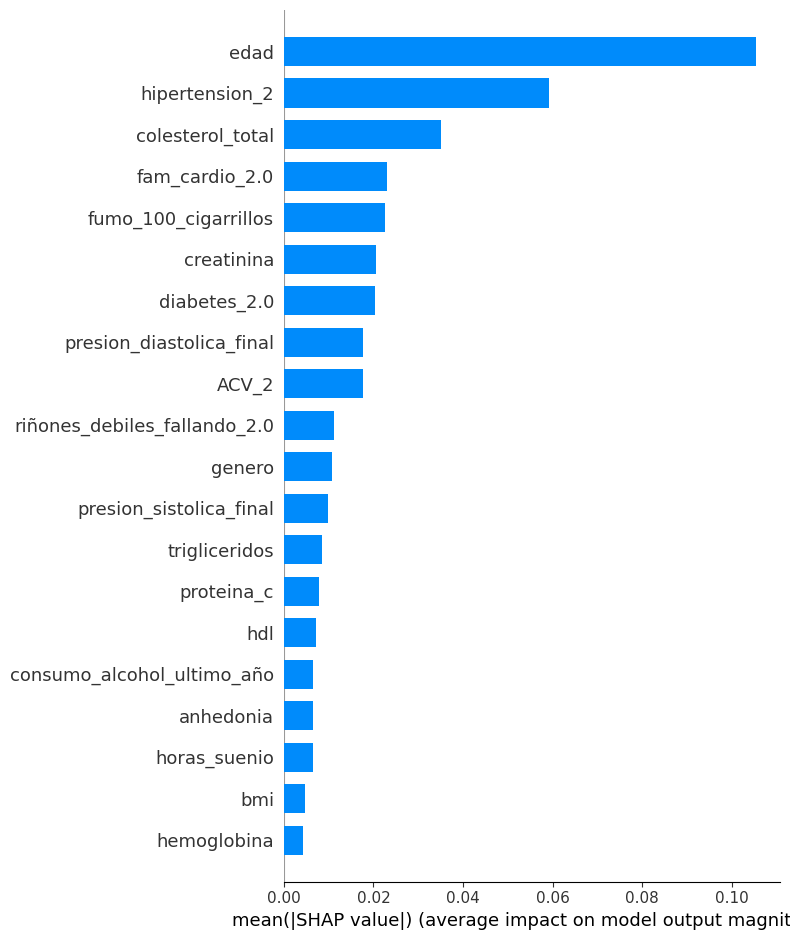

Global summary plot (bar type) for Balanced Random Forest generated.


In [35]:
shap.summary_plot(shap_values_brf[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Balanced Random Forest generated.")

In [36]:
instance_to_explain_brf = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for Balanced Random Forest.")

Selected a specific instance from X_test for local explanation for Balanced Random Forest.


In [37]:
shap_values_instance_brf = explainer_brf.shap_values(instance_to_explain_brf)
print("SHAP values for the selected instance calculated for Balanced Random Forest.")

SHAP values for the selected instance calculated for Balanced Random Forest.


In [38]:
shap.force_plot(explainer_brf.expected_value[1], shap_values_instance_brf[0, :, 1], instance_to_explain_brf)
print("Local force plot for Balanced Random Forest generated.")

Local force plot for Balanced Random Forest generated.


### **Decision Tree Classifier**

In [39]:
explainer_dt = shap.TreeExplainer(modelo_dt, X_train)
print("SHAP TreeExplainer for Decision Tree Classifier initialized.")

SHAP TreeExplainer for Decision Tree Classifier initialized.


In [40]:
shap_values_dt = explainer_dt.shap_values(X_test)
print("SHAP values for Decision Tree Classifier calculated.")

SHAP values for Decision Tree Classifier calculated.


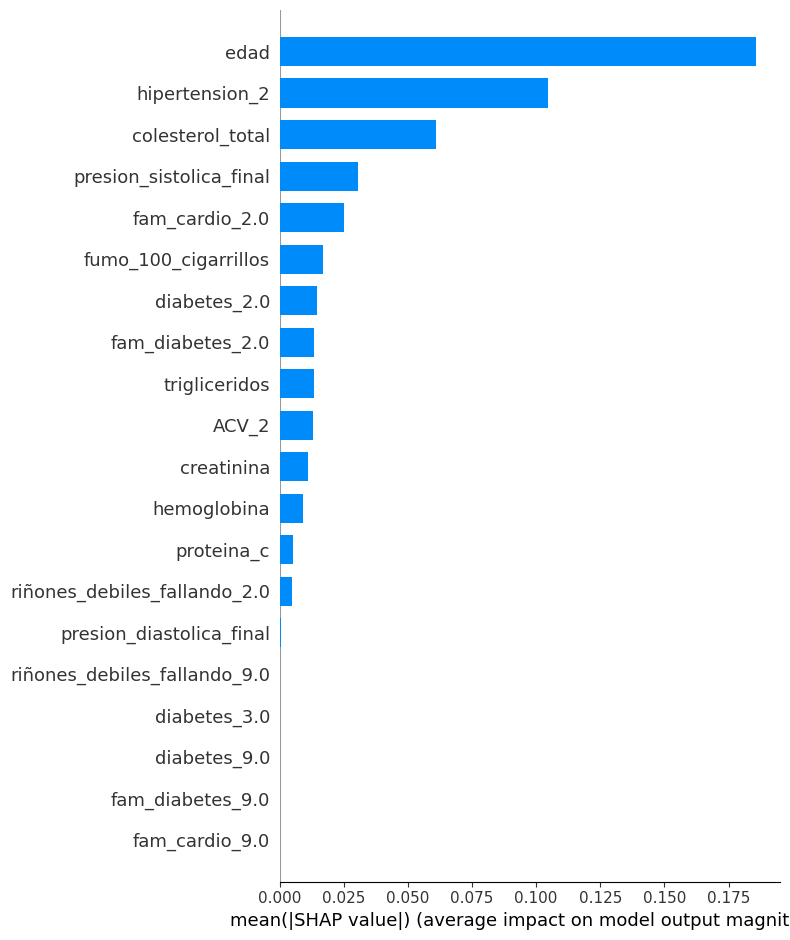

Global summary plot (bar type) for Decision Tree Classifier generated.


In [41]:
shap.summary_plot(shap_values_dt[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Decision Tree Classifier generated.")

In [42]:
instance_to_explain_dt = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for Decision Tree Classifier.")

Selected a specific instance from X_test for local explanation for Decision Tree Classifier.


In [43]:
shap_values_instance_dt = explainer_dt.shap_values(instance_to_explain_dt)
print("SHAP values for the selected instance calculated for Decision Tree Classifier.")

SHAP values for the selected instance calculated for Decision Tree Classifier.


In [44]:
shap.force_plot(explainer_dt.expected_value[1], shap_values_instance_dt[0, :, 1], instance_to_explain_dt)
print("Local force plot for Decision Tree Classifier generated.")

Local force plot for Decision Tree Classifier generated.


### **XGBoost**

In [45]:
import shap

explainer_xgb = shap.TreeExplainer(modelo_xgb, X_train_sm)
print("SHAP TreeExplainer para XGBoost inicializado (re-generado).")

SHAP TreeExplainer para XGBoost inicializado (re-generado).


In [46]:
shap_values_xgb = explainer_xgb.shap_values(X_test)
print("Valores SHAP para XGBoost calculados (re-generado).")

Valores SHAP para XGBoost calculados (re-generado).


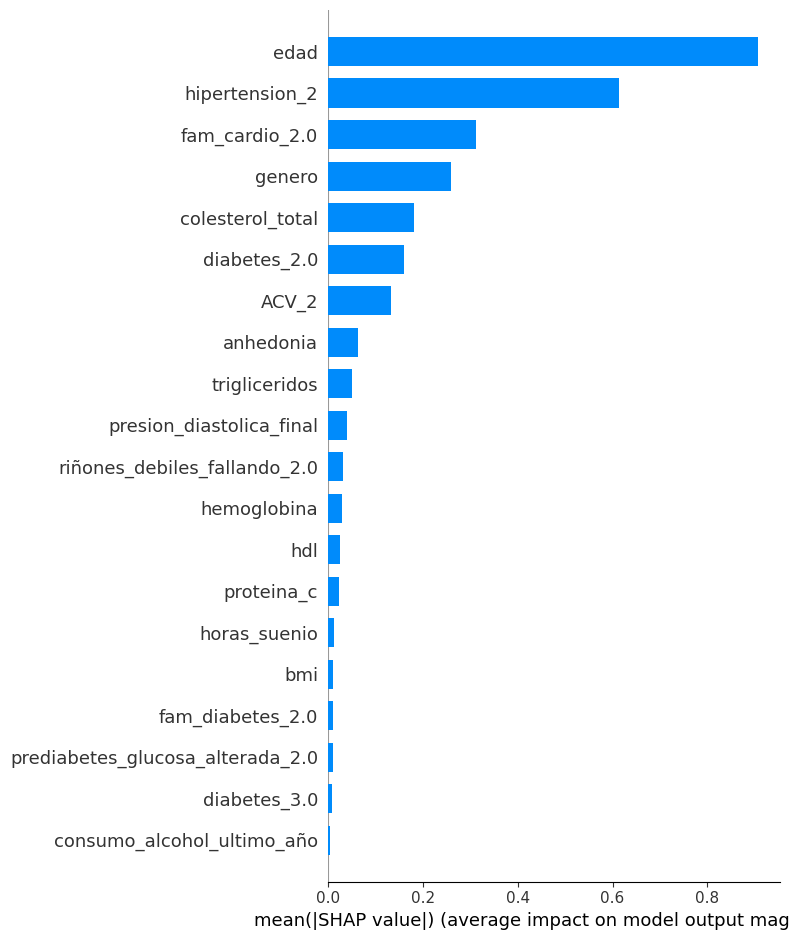

Gráfico de resumen global (barras) para XGBoost generado (re-generado).


In [47]:
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")
print("Gráfico de resumen global (barras) para XGBoost generado (re-generado).")

In [48]:
instance_to_explain_xgb = X_test.iloc[[0]]
shap_values_instance_xgb = explainer_xgb.shap_values(instance_to_explain_xgb)

print("Instancia específica para explicación local de XGBoost seleccionada y valores SHAP calculados (re-generado).")

Instancia específica para explicación local de XGBoost seleccionada y valores SHAP calculados (re-generado).


In [49]:
shap.force_plot(explainer_xgb.expected_value, shap_values_instance_xgb, instance_to_explain_xgb)
print("Gráfico de fuerza local para XGBoost generado (re-generado).")

Gráfico de fuerza local para XGBoost generado (re-generado).


### **SVM Linear Kernel**

In [50]:
explainer_svm = shap.LinearExplainer(modelo_svm, X_train)
print("SHAP LinearExplainer for SVM Linear Kernel initialized.")

SHAP LinearExplainer for SVM Linear Kernel initialized.


In [51]:
shap_values_svm = explainer_svm.shap_values(X_test)
print("SHAP values for SVM Linear Kernel calculated.")

SHAP values for SVM Linear Kernel calculated.


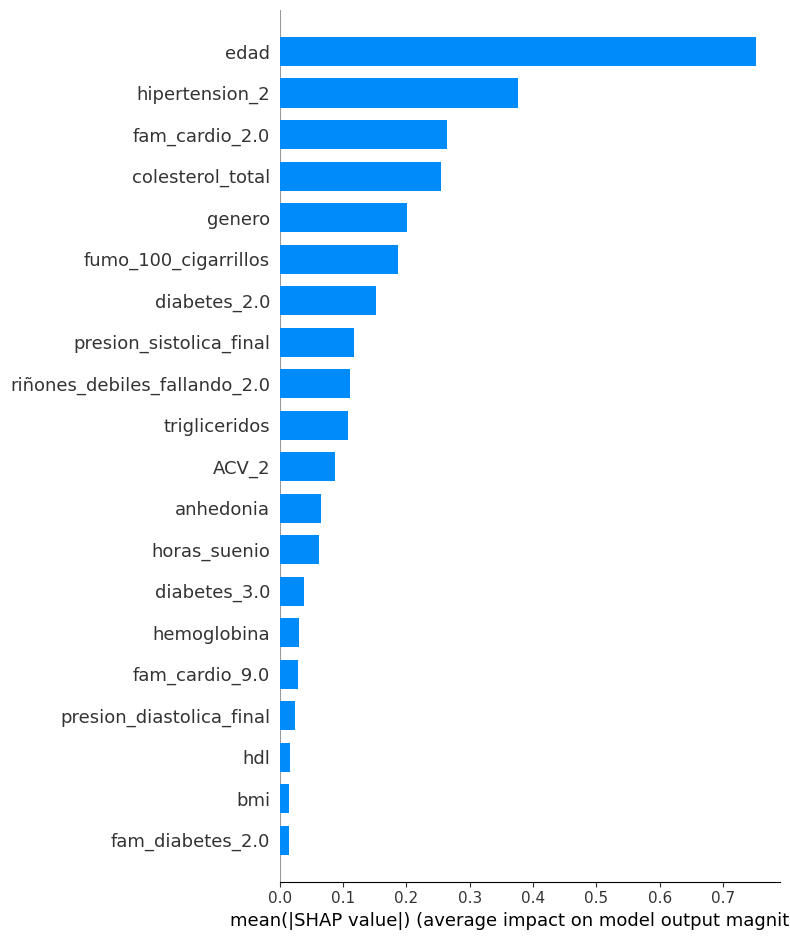

Global summary plot (bar type) for SVM Linear Kernel generated.


In [52]:
shap.summary_plot(shap_values_svm, X_test, plot_type="bar")
print("Global summary plot (bar type) for SVM Linear Kernel generated.")

In [53]:
instance_to_explain_lr = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for SVM Linear Kernel.")

Selected a specific instance from X_test for local explanation for SVM Linear Kernel.


In [54]:
shap_values_instance_lr = explainer_svm.shap_values(instance_to_explain_lr)
print("SHAP values for the selected instance calculated for SVM Linear Kernel.")

SHAP values for the selected instance calculated for SVM Linear Kernel.


In [55]:
shap.force_plot(explainer_svm.expected_value, shap_values_instance_lr, instance_to_explain_lr)
print("Local force plot for SVM Linear Kernel generated.")

Local force plot for SVM Linear Kernel generated.


## **ETAPAS**

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   bmi                                    1114 non-null   float64
 7   fumo_100_cigarrillos                   1114 non-null   int64  
 8   horas_suenio                           1114 non-null   float64
 9   anhedonia                              1114 non-null   float64
 10  hemoglobina                            1114 non-null   float64
 11  crea

In [57]:
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'consumo_alcohol_ultimo_año',
#     'act_vigorosa', 'actividad_deportiva_moderada_x_semana']

# # NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# # Datos que requieren una historia clínica o un tensiómetro.
# nivel_2_antecedentes = [
#     'fam_cardio_2.0','fam_cardio_9.0', 'fam_diabetes_2.0','fam_diabetes_9.0', 'hipertension_2',
#     'hipertension_9', 'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
#     'ACV_2','ACV_9', 'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0',
#     'presion_sistolica_final', 'presion_diastolica_final'
# ]

# # NIVEL 3: Laboratorio Avanzado
# # Resultados bioquímicos específicos.
# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c', 'hemoglobina', 'creatinina'
# ]

# # Unificamos todas para el entrenamiento inicial
# features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

# # ETAPA 1: Lo que el paciente cuenta (Mínimo esfuerzo)
# nivel_1_basico = [
#     'edad', 'genero', 'fumador_actual', 'consumo_alcohol_ultimo_año',
#     'act_vigorosa', 'actividad_deportiva_moderada_x_semana',
#     'horas_suenio', 'anhedonia'
# ]

# # ETAPA 2: Lo que el médico mide (Examen Físico)
# nivel_2_antecedentes = [
#     'bmi', 'presion_sistolica_final', 'presion_diastolica_final',
#     'fam_cardio_2.0', 'fam_cardio_9.0', 'fam_diabetes_2.0', 'fam_diabetes_9.0',
#     'ACV_2.0', 'ACV_9.0', 'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0','hipertension_2.0', 'hipertension_9.0'
# ]

# # ETAPA 3: Lo que la sangre revela (Laboratorio)
# # nivel_3_laboratorio = [
# #     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
# #     'hemoglobina', 'creatinina', 'diabetes_2.0', 'diabetes_3.0',
# #     'prediabetes_glucosa_alterada', 'hipertension_2.0', 'hipertension_9.0'
# # ]

# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
#     'hemoglobina', 'creatinina']

# ETAPA 1: Lo que el paciente cuenta (Mínimo esfuerzo)
nivel_1_basico = [
    'edad', 'genero', 'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana',
    'horas_suenio', 'anhedonia'
]

# ETAPA 2: Lo que el médico mide (Examen Físico)
nivel_2_antecedentes = [
    'bmi', 'presion_sistolica_final', 'presion_diastolica_final',
    'fam_cardio_2.0', 'fam_cardio_9.0', 'fam_diabetes_2.0', 'fam_diabetes_9.0','diabetes_2.0', 'diabetes_3.0','prediabetes_glucosa_alterada',
    'ACV_2.0', 'ACV_9.0', 'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0','hipertension_2.0', 'hipertension_9.0'
]

# ETAPA 3: Lo que la sangre revela (Laboratorio)
# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
#     'hemoglobina', 'creatinina', 'diabetes_2.0', 'diabetes_3.0',
#     'prediabetes_glucosa_alterada', 'hipertension_2.0', 'hipertension_9.0'
# ]

nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'hemoglobina', 'creatinina']

In [58]:
nivel_1_cols = [c for c in nivel_1_basico if c in X_train.columns]
nivel_2_cols = nivel_1_cols + [c for c in nivel_2_antecedentes if c in X_train.columns]
nivel_3_cols = nivel_2_cols + [c for c in nivel_3_laboratorio if c in X_train.columns]

etapas = [nivel_2_cols, nivel_3_cols]
nombres_etapas = ["Etapa 1: Consulta Básica", "Etapa 2: + Antecedentes/Presión", "Etapa 3: + Laboratorio"]


 PROCESANDO: Etapa 1: Consulta Básica

===== Etapa 1: Consulta Básica ====
---- TRAIN ----
AUC: 0.9428
Recall: 0.9588
Precision: 0.5852
F1: 0.7268

---- TEST ----
AUC: 0.8232
Recall: 0.8286
Precision: 0.2014
F1: 0.3240

---- GAP (Train-Test) ----
AUC gap: 0.1195
Recall gap: 0.1303


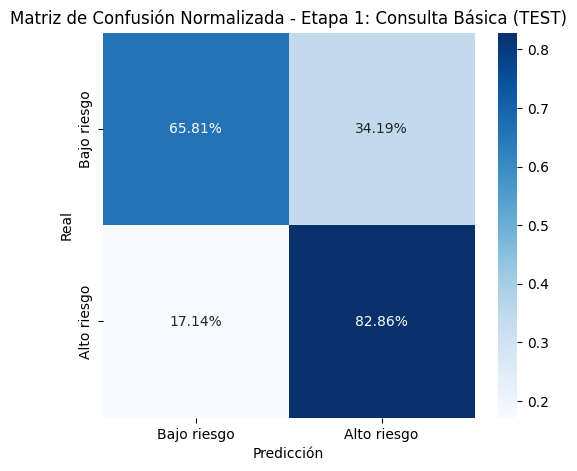


 PROCESANDO: Etapa 2: + Antecedentes/Presión

===== Etapa 2: + Antecedentes/Presión ====
---- TRAIN ----
AUC: 0.9438
Recall: 0.9618
Precision: 0.5992
F1: 0.7384

---- TEST ----
AUC: 0.8254
Recall: 0.8381
Precision: 0.2126
F1: 0.3391

---- GAP (Train-Test) ----
AUC gap: 0.1184
Recall gap: 0.1237


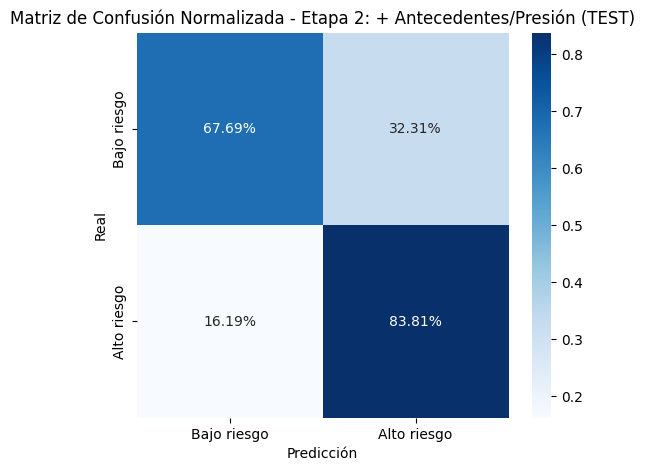

In [59]:
resultados_etapas = []

for i in range(len(etapas)):
    X_train_etapa = X_train_sm[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    modelo_etapa = XGBClassifier(
        n_estimators=200,
        max_depth=2,
        learning_rate=0.03,
        subsample=0.6,
        colsample_bytree=0.8,
        scale_pos_weight=2,
        eval_metric="auc",
        random_state=42
    )

    modelo_etapa.fit(X_train_etapa, y_train_sm)

    print(f"\n PROCESANDO: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa,
        X_train_etapa, y_train_sm,
        X_test_etapa, y_test,
        threshold=0.3,
        nombre=nombres_etapas[i]
    )

    resultados_etapas.append({"Etapa": nombres_etapas[i], **metricas})

# Convertimos a DataFrame para comparar
df_etapas = pd.DataFrame(resultados_etapas)

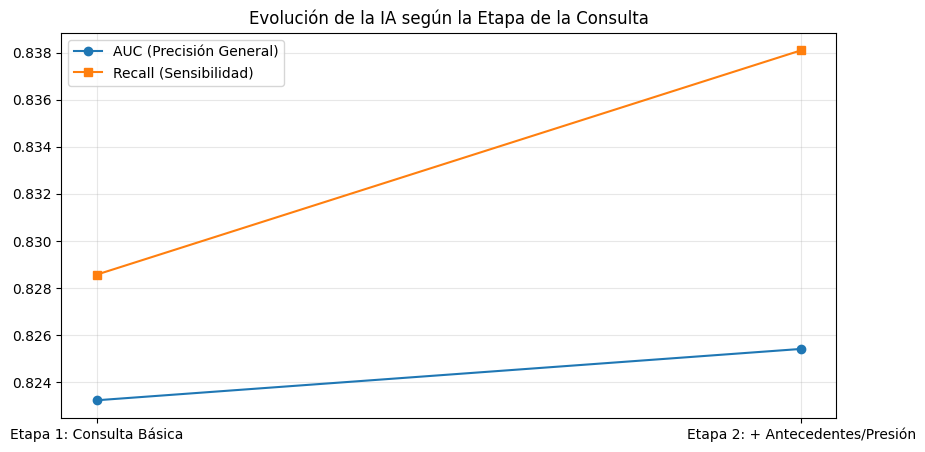

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(df_etapas['Etapa'], df_etapas['auc_test'], marker='o', label='AUC (Precisión General)')
plt.plot(df_etapas['Etapa'], df_etapas['recall_test'], marker='s', label='Recall (Sensibilidad)')
plt.title('Evolución de la IA según la Etapa de la Consulta')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 1: Consulta Básica

===== LR - Etapa 1: Consulta Básica ====
---- TRAIN ----
AUC: 0.8627
Recall: 0.8863
Precision: 0.2229
F1: 0.3562

---- TEST ----
AUC: 0.8325
Recall: 0.8381
Precision: 0.2095
F1: 0.3352

---- GAP (Train-Test) ----
AUC gap: 0.0302
Recall gap: 0.0482


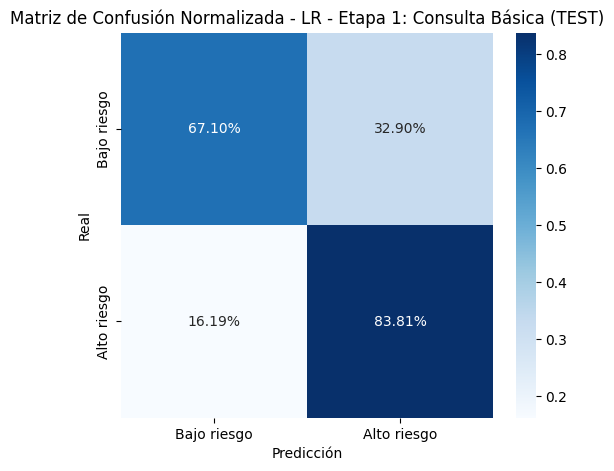


🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 2: + Antecedentes/Presión

===== LR - Etapa 2: + Antecedentes/Presión ====
---- TRAIN ----
AUC: 0.8689
Recall: 0.8910
Precision: 0.2321
F1: 0.3683

---- TEST ----
AUC: 0.8408
Recall: 0.8476
Precision: 0.2231
F1: 0.3532

---- GAP (Train-Test) ----
AUC gap: 0.0281
Recall gap: 0.0434


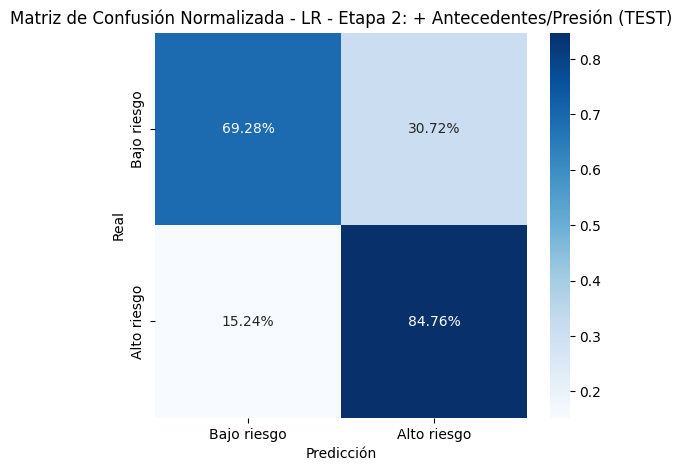


📊 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):
                             Etapa  auc_test  recall_test  precision_test
0         Etapa 1: Consulta Básica  0.832470     0.838095        0.209524
1  Etapa 2: + Antecedentes/Presión  0.840814     0.847619        0.223058


In [61]:
from sklearn.linear_model import LogisticRegression

resultados_etapas_lr = []

# Bucle de entrenamiento por etapas usando Regresión Logística
for i in range(len(etapas)):
    # Se selecciona las columnas de la etapa actual
    X_train_etapa = X_train[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    # Configuración la Regresión Logística
    # 'max_iter' alto para asegurar convergencia y 'class_weight=None'
    # porque ya balanceamos con SMOTE antes.
    modelo_etapa_lr = LogisticRegression(
        class_weight='balanced',
        max_iter=2000
    )

    modelo_etapa_lr.fit(X_train_etapa, y_train)

    print(f"\n🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa_lr,
        X_train_etapa, y_train,
        X_test_etapa, y_test,
        threshold=0.4,
        nombre=f"LR - {nombres_etapas[i]}"
    )

    resultados_etapas_lr.append({"Etapa": nombres_etapas[i], **metricas})


df_etapas_lr = pd.DataFrame(resultados_etapas_lr)

# Resumen final de precisión
print("\n📊 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):")
print(df_etapas_lr[['Etapa', 'auc_test', 'recall_test', 'precision_test']])

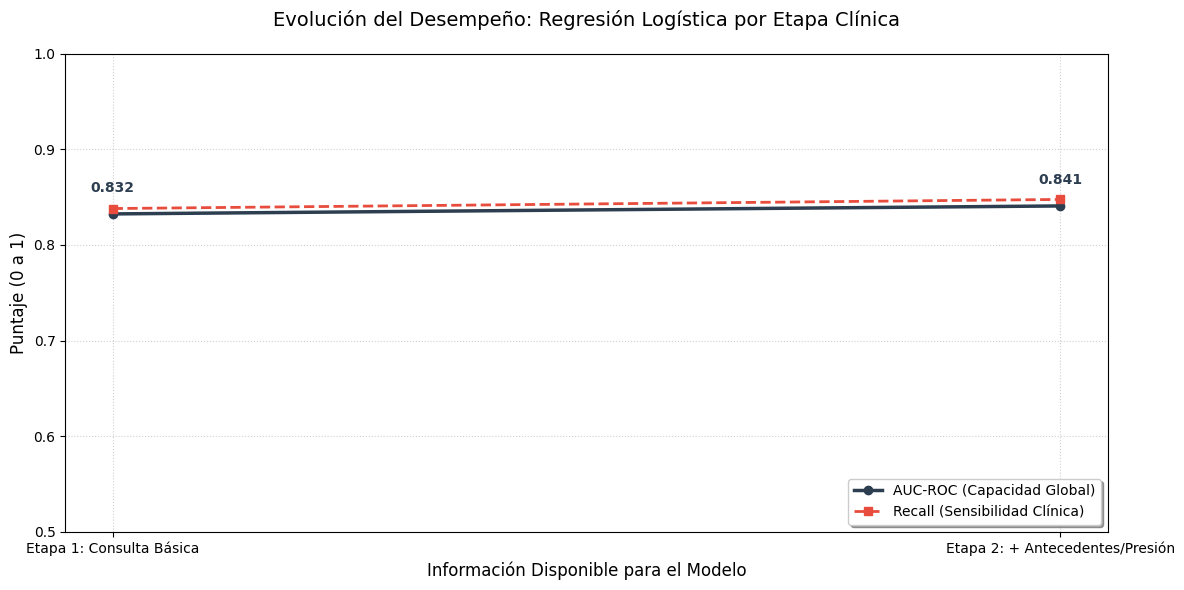

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: Regresión Logística por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.6)

for x, y in zip(df_etapas_lr['Etapa'], df_etapas_lr['auc_test']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

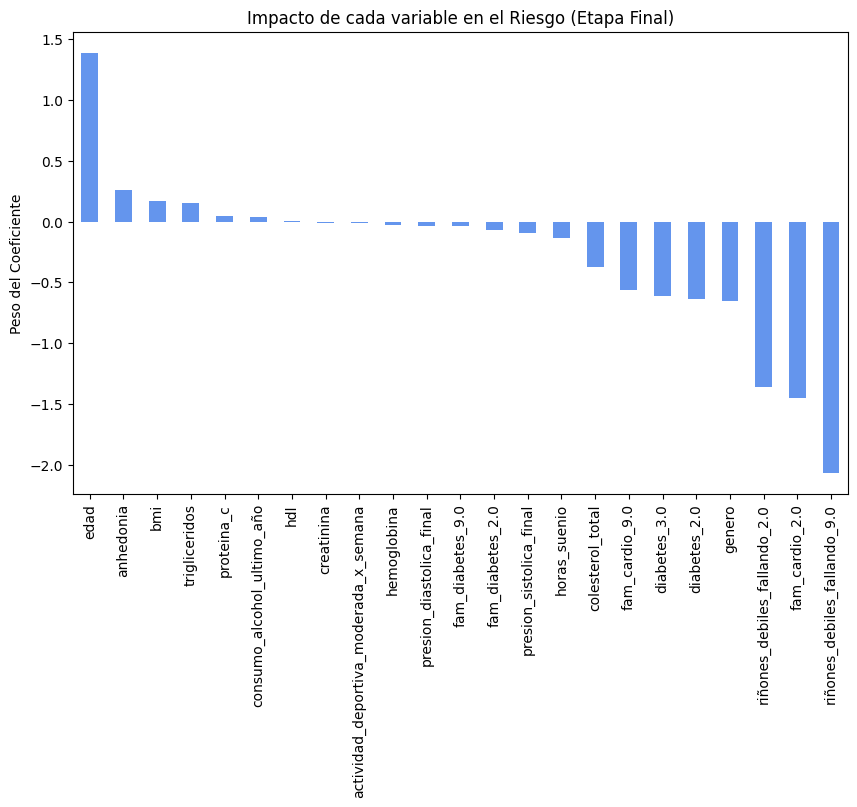

In [63]:
# Ver coeficientes de la Etapa 1 (solo consulta)
# Tomamos el primer modelo entrenado en el bucle (i=0)
importances_lr = pd.Series(modelo_etapa_lr.coef_[0], index=etapas[i]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_lr.plot(kind='bar', color='cornflowerblue')
plt.title('Impacto de cada variable en el Riesgo (Etapa Final)')
plt.ylabel('Peso del Coeficiente')
plt.show()

## **OPTUNA**

In [64]:
pip install optuna

### **Random Forest**

In [65]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def objective_rf(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Crear el modelo RandomForestClassifier
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Entrenar el modelo
    model.fit(X_train_sm, y_train_sm)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for RandomForestClassifier defined.")

Objective function for RandomForestClassifier defined.


In [ ]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

print("\nBest trial for RandomForestClassifier:")
print(f"  Value: {study_rf.best_value:.4f}")
print("  Params: ")
for key, value in study_rf.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Random Forest + SMOTE ====
---- TRAIN ----
AUC: 0.9891
Recall: 0.9792
Precision: 0.7877
F1: 0.8731

---- TEST ----
AUC: 0.8547
Recall: 0.7143
Precision: 0.3191
F1: 0.4412

---- GAP (Train-Test) ----
AUC gap: 0.1344
Recall gap: 0.2649


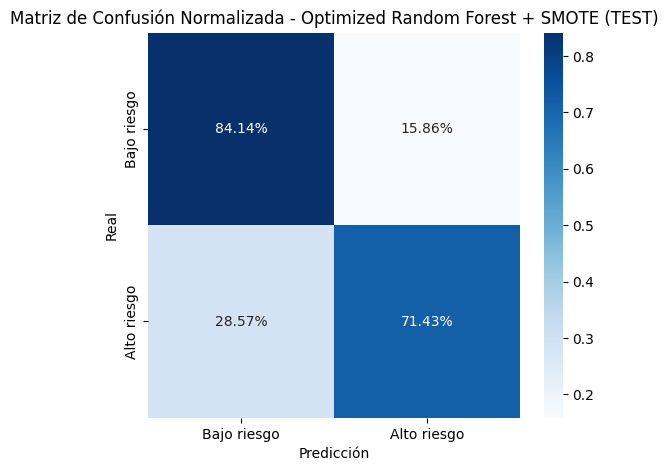

Optimized RandomForestClassifier trained, evaluated, and results stored.


In [67]:
modelo_rf_opt = RandomForestClassifier(
    **study_rf.best_params,
    random_state=42
)
modelo_rf_opt.fit(X_train_sm, y_train_sm)

# Evaluar el modelo optimizado
rf_opt_metrics = evaluar_overfitting(
    modelo_rf_opt,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized Random Forest + SMOTE"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Random Forest + SMOTE", **rf_opt_metrics})

print("Optimized RandomForestClassifier trained, evaluated, and results stored.")

### **XGBOOST**

In [68]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

def objective_xgb(trial):
    # Sugerir hiperparámetros para XGBoost
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    # scale_pos_weight para manejar el desbalance de clases
    # Como X_train_sm ya está resampleado, usamos un valor más cercano a 1 o 1 directamente
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 5.0)

    # Crear el modelo XGBoostClassifier
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        scale_pos_weight=scale_pos_weight,
        eval_metric="auc",
        use_label_encoder=False, # Suprimir el warning de label encoder
        random_state=42
    )

    # Entrenar el modelo con los datos de SMOTE
    model.fit(X_train_sm, y_train_sm)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for XGBoostClassifier defined.")

Objective function for XGBoostClassifier defined.


In [ ]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)

print("\nBest trial for XGBoostClassifier:")
print(f"  Value: {study_xgb.best_value:.4f}")
print("  Params: ")
for key, value in study_xgb.best_params.items():
    print(f"    {key}: {value}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:01:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== Optimized XGBoost ====
---- TRAIN ----
AUC: 0.9848
Recall: 0.9816
Precision: 0.7332
F1: 0.8394

---- TEST ----
AUC: 0.8527
Recall: 0.7714
Precision: 0.2862
F1: 0.4175

---- GAP (Train-Test) ----
AUC gap: 0.1322
Recall gap: 0.2102


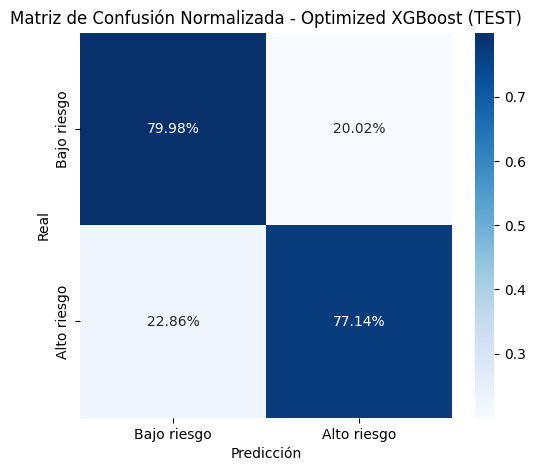

Optimized XGBoostClassifier trained, evaluated, and results stored.


In [70]:
modelo_xgb_opt = XGBClassifier(
    **study_xgb.best_params,
    eval_metric="auc",
    use_label_encoder=False, # Suprimir el warning de label encoder
    random_state=42
)
modelo_xgb_opt.fit(X_train_sm, y_train_sm)

# Evaluar el modelo optimizado
xgb_opt_metrics = evaluar_overfitting(
    modelo_xgb_opt,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized XGBoost"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized XGBoost", **xgb_opt_metrics})

print("Optimized XGBoostClassifier trained, evaluated, and results stored.")

### **CATBOOST**

In [71]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def objective_cat(trial):
    # Sugerir hiperparámetros para CatBoost
    iterations = trial.suggest_int('iterations', 50, 500)
    depth = trial.suggest_int('depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10.0, log=True)
    # scale_pos_weight para manejar el desbalance de clases
    # Como X_train_sm ya está resampleado, usamos un valor más cercano a 1 o 1 directamente
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 5.0)

    # Crear el modelo CatBoostClassifier
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        loss_function='Logloss',
        scale_pos_weight=scale_pos_weight,
        verbose=0,
        random_state=42,
        allow_writing_files=False # Avoid creating temporary files
    )

    # Entrenar el modelo con los datos de SMOTE
    model.fit(X_train_sm, y_train_sm)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for CatBoostClassifier defined.")

Objective function for CatBoostClassifier defined.


In [ ]:
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=50, show_progress_bar=True)

print("\nBest trial for CatBoostClassifier:")
print(f"  Value: {study_cat.best_value:.4f}")
print("  Params: ")
for key, value in study_cat.best_params.items():
    print(f"    {key}: {value}")


===== Optimized CatBoost ====
---- TRAIN ----
AUC: 1.0000
Recall: 1.0000
Precision: 0.9786
F1: 0.9892

---- TEST ----
AUC: 0.8536
Recall: 0.5048
Precision: 0.3759
F1: 0.4309

---- GAP (Train-Test) ----
AUC gap: 0.1464
Recall gap: 0.4952


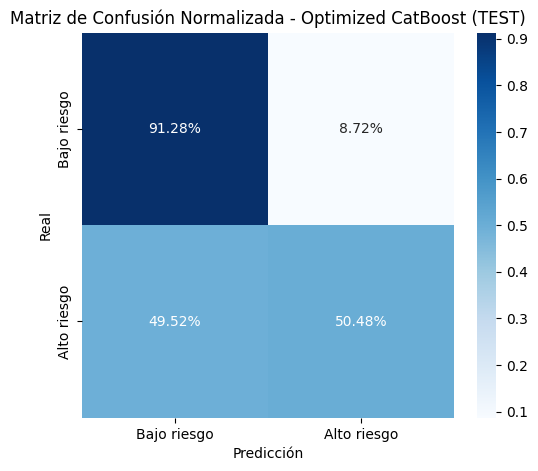

Optimized CatBoostClassifier trained, evaluated, and results stored.


In [73]:
modelo_cat_opt = CatBoostClassifier(
    **study_cat.best_params,
    loss_function='Logloss',
    verbose=0,
    random_state=42,
    allow_writing_files=False # Avoid creating temporary files
)
modelo_cat_opt.fit(X_train_sm, y_train_sm)

# Evaluar el modelo optimizado
cat_opt_metrics = evaluar_overfitting(
    modelo_cat_opt,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Optimized CatBoost"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized CatBoost", **cat_opt_metrics})

print("Optimized CatBoostClassifier trained, evaluated, and results stored.")

### **BALANCE RAMDOM FOREST**

In [74]:
import optuna
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score

def objective_brf(trial):
    # Sugerir hiperparámetros para BalancedRandomForestClassifier
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Crear el modelo BalancedRandomForestClassifier
    model = BalancedRandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        sampling_strategy='auto',
        replacement=False
    )

    # Entrenar el modelo con los datos originales (no SMOTE, ya que BRF maneja el balanceo)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for BalancedRandomForestClassifier defined.")

Objective function for BalancedRandomForestClassifier defined.


In [ ]:
study_brf = optuna.create_study(direction='maximize')
study_brf.optimize(objective_brf, n_trials=50, show_progress_bar=True)

print("\nBest trial for BalancedRandomForestClassifier:")
print(f"  Value: {study_brf.best_value:.4f}")
print("  Params: ")
for key, value in study_brf.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Balanced Random Forest ====
---- TRAIN ----
AUC: 0.9509
Recall: 0.9929
Precision: 0.2361
F1: 0.3814

---- TEST ----
AUC: 0.8579
Recall: 0.9048
Precision: 0.2102
F1: 0.3411

---- GAP (Train-Test) ----
AUC gap: 0.0929
Recall gap: 0.0881


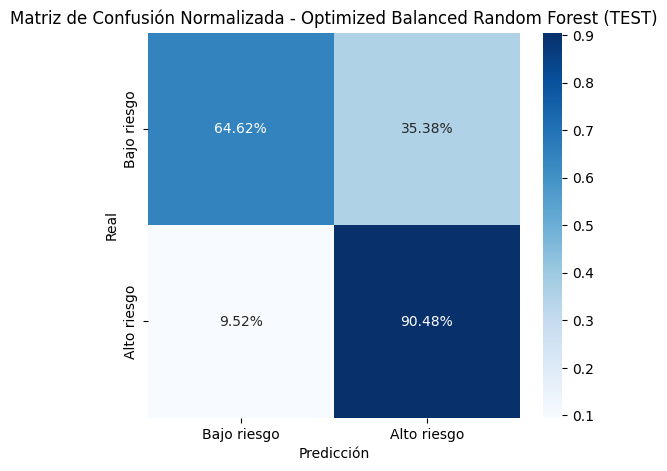

Optimized BalancedRandomForestClassifier trained, evaluated, and results stored.


In [76]:
modelo_brf_opt = BalancedRandomForestClassifier(
    **study_brf.best_params,
    random_state=42,
    sampling_strategy='auto',
    replacement=False
)
modelo_brf_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
brf_opt_metrics = evaluar_overfitting(
    modelo_brf_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Optimized Balanced Random Forest"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Balanced Random Forest", **brf_opt_metrics})

print("Optimized BalancedRandomForestClassifier trained, evaluated, and results stored.")

### **LOGISTIC REGRESSION**

In [77]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def objective_lr(trial):
    # Sugerir hiperparámetros para Logistic Regression
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])

    # Crear el modelo LogisticRegression
    model = LogisticRegression(
        C=C,
        solver=solver,
        class_weight='balanced',
        max_iter=2000, # Increased max_iter for convergence
        random_state=42
    )

    # Entrenar el modelo con los datos originales (class_weight='balanced' maneja el desbalance)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for LogisticRegression defined.")

Objective function for LogisticRegression defined.


In [ ]:
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=50, show_progress_bar=True)

print("\nBest trial for LogisticRegression:")
print(f"  Value: {study_lr.best_value:.4f}")
print("  Params: ")
for key, value in study_lr.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Logistic Regression ====
---- TRAIN ----
AUC: 0.8887
Recall: 0.8815
Precision: 0.2569
F1: 0.3979

---- TEST ----
AUC: 0.8692
Recall: 0.8571
Precision: 0.2528
F1: 0.3905

---- GAP (Train-Test) ----
AUC gap: 0.0195
Recall gap: 0.0244


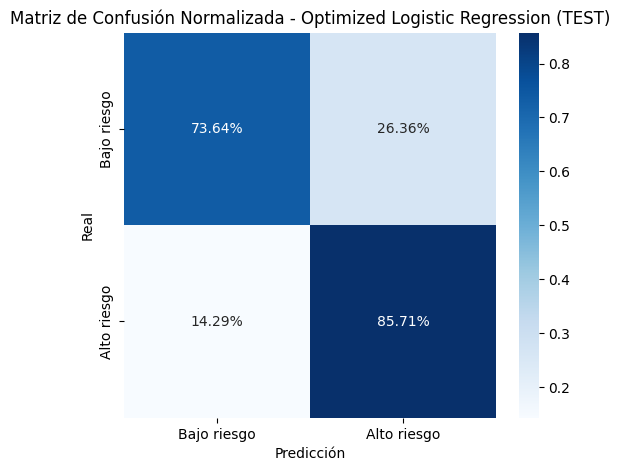

Optimized LogisticRegression trained, evaluated, and results stored.


In [79]:
modelo_lr_opt = LogisticRegression(
    **study_lr.best_params,
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)
modelo_lr_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
lr_opt_metrics = evaluar_overfitting(
    modelo_lr_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Optimized Logistic Regression"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Logistic Regression", **lr_opt_metrics})

print("Optimized LogisticRegression trained, evaluated, and results stored.")

### **DECISION TREE**

In [80]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

def objective_dt(trial):
    # Sugerir hiperparámetros para DecisionTreeClassifier
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Crear el modelo DecisionTreeClassifier
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        class_weight='balanced', # Mantener el balanceo de clases
        random_state=42
    )

    # Entrenar el modelo con los datos originales (class_weight='balanced' maneja el desbalance)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for DecisionTreeClassifier defined.")

Objective function for DecisionTreeClassifier defined.


In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=50, show_progress_bar=True)

print("\nBest trial for DecisionTreeClassifier:")
print(f"  Value: {study_dt.best_value:.4f}")
print("  Params: ")
for key, value in study_dt.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Decision Tree Classifier ====
---- TRAIN ----
AUC: 0.8583
Recall: 0.9716
Precision: 0.1930
F1: 0.3221

---- TEST ----
AUC: 0.8005
Recall: 0.9143
Precision: 0.1768
F1: 0.2963

---- GAP (Train-Test) ----
AUC gap: 0.0578
Recall gap: 0.0573


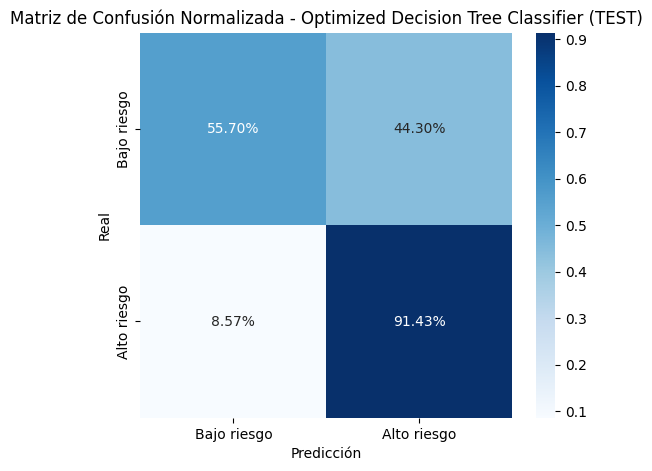

Optimized DecisionTreeClassifier trained, evaluated, and results stored.


In [82]:
modelo_dt_opt = DecisionTreeClassifier(
    **study_dt.best_params,
    random_state=42,
    class_weight='balanced'
)
modelo_dt_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
dt_opt_metrics = evaluar_overfitting(
    modelo_dt_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized Decision Tree Classifier"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Decision Tree Classifier", **dt_opt_metrics})

print("Optimized DecisionTreeClassifier trained, evaluated, and results stored.")

### **SVM**

In [83]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

def objective_svm(trial):
    # Sugerir hiperparámetros para SVM con kernel lineal
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)

    # Crear el modelo SVC con kernel lineal
    model = SVC(
        kernel='linear',
        C=C,
        probability=True, # Necesario para predict_proba
        class_weight='balanced', # Mantener el balanceo de clases
        random_state=42
    )

    # Entrenar el modelo con los datos originales (class_weight='balanced' maneja el desbalance)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for SVM Linear Kernel defined.")

Objective function for SVM Linear Kernel defined.


In [ ]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50, show_progress_bar=True)

print("\nBest trial for SVM Linear Kernel:")
print(f"  Value: {study_svm.best_value:.4f}")
print("  Params: ")
for key, value in study_svm.best_params.items():
    print(f"    {key}: {value}")


===== Optimized SVM Linear Kernel ====
---- TRAIN ----
AUC: 0.8881
Recall: 0.3863
Precision: 0.4429
F1: 0.4127

---- TEST ----
AUC: 0.8677
Recall: 0.3429
Precision: 0.4500
F1: 0.3892

---- GAP (Train-Test) ----
AUC gap: 0.0204
Recall gap: 0.0434


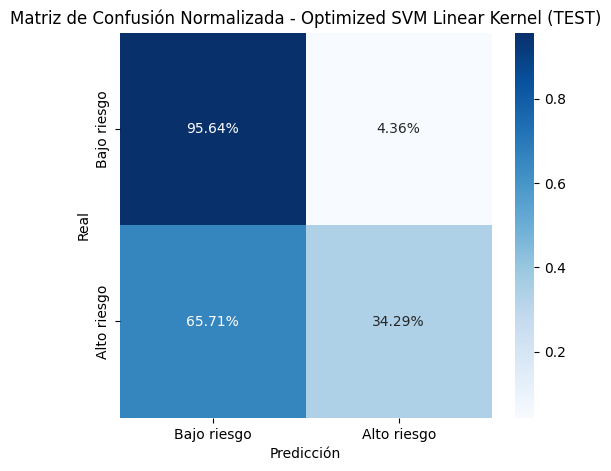

Optimized SVM Linear Kernel trained, evaluated, and results stored.


In [85]:
modelo_svm_opt = SVC(
    **study_svm.best_params,
    kernel='linear',
    probability=True,
    class_weight='balanced',
    random_state=42
)
modelo_svm_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
svm_opt_metrics = evaluar_overfitting(
    modelo_svm_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized SVM Linear Kernel"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized SVM Linear Kernel", **svm_opt_metrics})

print("Optimized SVM Linear Kernel trained, evaluated, and results stored.")

### **RESULTADOS**

In [86]:
df_optimized_results = pd.DataFrame(results)

print("Summary of all model results (original and optimized):")
df_optimized_results

Summary of all model results (original and optimized):


,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Random Forest + SMOTE,0.958675,0.948909,0.674542,0.788541,0.845137,0.761905,0.256410,0.383693,0.113539,0.187004
1,XGBoost,0.955123,0.963294,0.630724,0.762316,0.845977,0.838095,0.234043,0.365904,0.109146,0.125198
2,CatBoost,0.981080,0.994048,0.631181,0.772106,0.851498,0.838095,0.218905,0.347140,0.129582,0.155952
3,Balanced Random Forest,0.998746,1.000000,0.330721,0.497055,0.847435,0.800000,0.247788,0.378378,0.151311,0.200000
4,Logistic Regression,0.887826,0.881517,0.255670,0.396377,0.868101,0.857143,0.252101,0.389610,0.019725,0.024374
5,Decision Tree Classifier,0.890845,0.976303,0.225137,0.365897,0.760206,0.800000,0.185430,0.301075,0.130640,0.176303
6,SVM Linear Kernel,0.887561,0.388626,0.443243,0.414141,0.867120,0.352381,0.456790,0.397849,0.020442,0.036245
7,Optimized Random Forest + SMOTE,0.989137,0.979167,0.787709,0.873065,0.854745,0.714286,0.319149,0.441176,0.134391,0.264881
8,Optimized XGBoost,0.984822,0.981647,0.733235,0.839449,0.852669,0.771429,0.286219,0.417526,0.132153,0.210218
9,Optimized CatBoost,0.999996,1.000000,0.978641,0.989205,0.853641,0.504762,0.375887,0.430894,0.146355,0.495238


<>:18: SyntaxWarning: invalid escape sequence '\+'
<>:18: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipython-input-308357779.py:18: SyntaxWarning: invalid escape sequence '\+'
  df_optimized['Modelo_base'] = df_optimized['Modelo'].str.replace('Optimized ', '').str.replace(' \+ SMOTE', '')


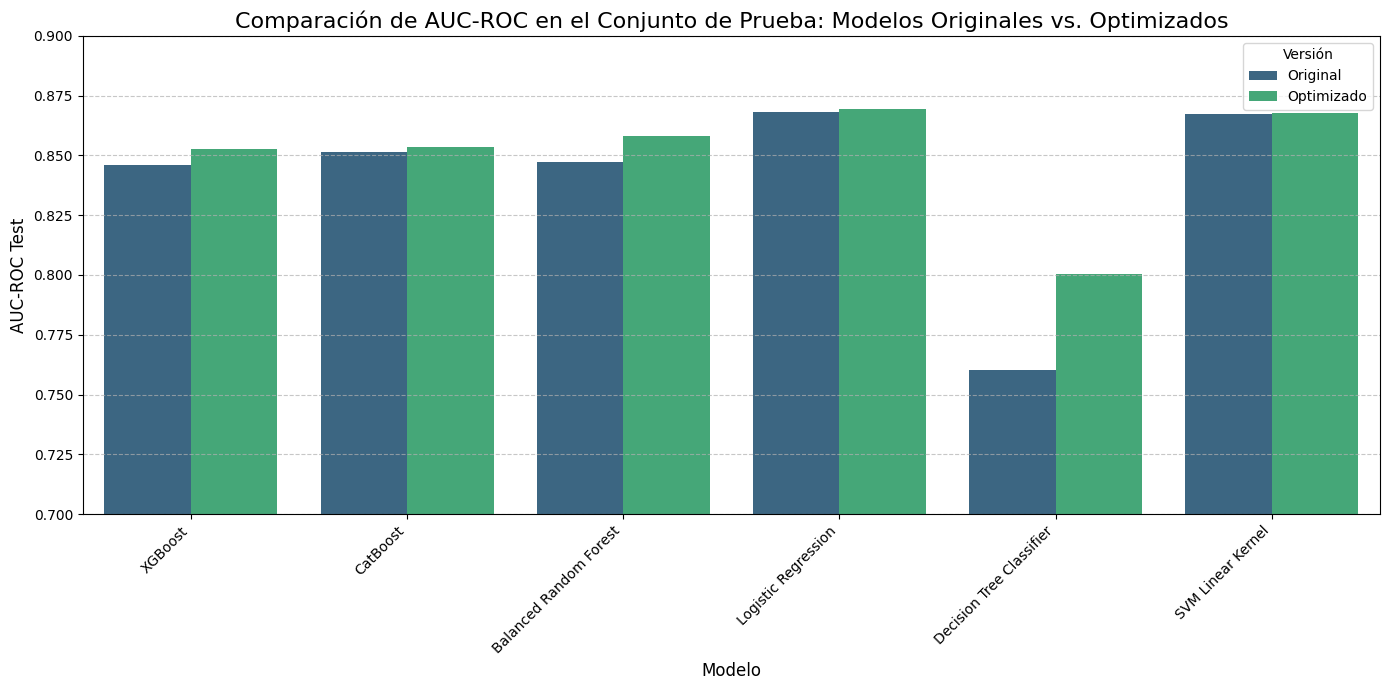

Bar chart comparing original and optimized model AUC-ROC scores generated.


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los resultados originales de los optimizados
df_original = df_optimized_results[~df_optimized_results['Modelo'].str.contains('Optimized')].copy()
df_optimized = df_optimized_results[df_optimized_results['Modelo'].str.contains('Optimized')].copy()

# Crear una columna de nombre de modelo base para emparejar
df_original['Modelo_base'] = df_original['Modelo'].replace({
    'Random Forest + SMOTE': 'Random Forest',
    'XGBoost': 'XGBoost',
    'CatBoost': 'CatBoost',
    'Balanced Random Forest': 'Balanced Random Forest',
    'Logistic Regression': 'Logistic Regression',
    'Decision Tree Classifier': 'Decision Tree Classifier',
    'SVM Linear Kernel': 'SVM Linear Kernel'
})
df_optimized['Modelo_base'] = df_optimized['Modelo'].str.replace('Optimized ', '').str.replace(' \+ SMOTE', '')

# Unir los resultados por el nombre del modelo base
df_comparison = pd.merge(
    df_original[['Modelo_base', 'auc_test']],
    df_optimized[['Modelo_base', 'auc_test']],
    on='Modelo_base',
    suffixes=('_original', '_optimized')
)

# Preparar los datos para graficar
plot_data = df_comparison.melt(
    id_vars=['Modelo_base'],
    value_vars=['auc_test_original', 'auc_test_optimized'],
    var_name='Tipo de Modelo', value_name='AUC-ROC Test'
)

plot_data['Tipo de Modelo'] = plot_data['Tipo de Modelo'].replace({
    'auc_test_original': 'Original',
    'auc_test_optimized': 'Optimizado'
})

plt.figure(figsize=(14, 7))
sns.barplot(x='Modelo_base', y='AUC-ROC Test', hue='Tipo de Modelo', data=plot_data, palette='viridis')
plt.title('Comparación de AUC-ROC en el Conjunto de Prueba: Modelos Originales vs. Optimizados', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('AUC-ROC Test', fontsize=12)
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Versión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar chart comparing original and optimized model AUC-ROC scores generated.")

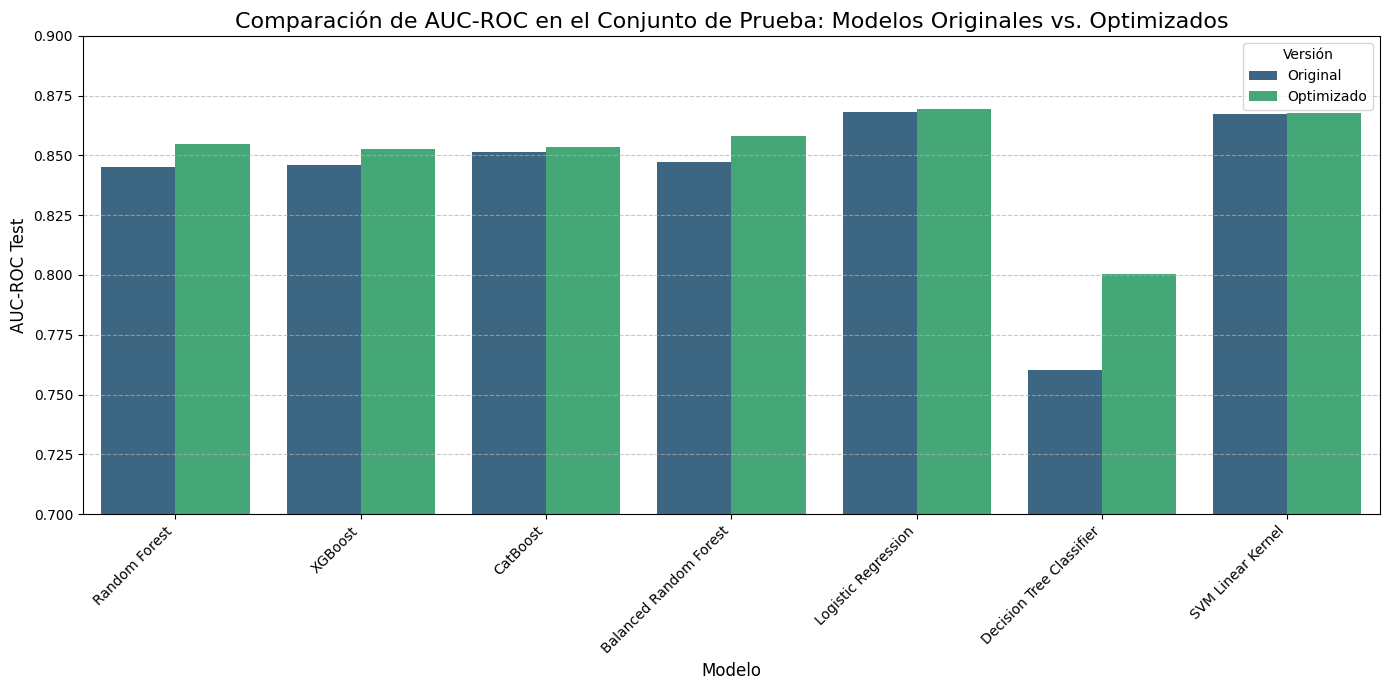

Bar chart comparing original and optimized model AUC-ROC scores generated.


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los resultados originales de los optimizados
df_original = df_optimized_results[~df_optimized_results['Modelo'].str.contains('Optimized')].copy()
df_optimized = df_optimized_results[df_optimized_results['Modelo'].str.contains('Optimized')].copy()

# Crear una columna de nombre de modelo base para emparejar
df_original['Modelo_base'] = df_original['Modelo'].replace({
    'Random Forest + SMOTE': 'Random Forest',
    'XGBoost': 'XGBoost',
    'CatBoost': 'CatBoost',
    'Balanced Random Forest': 'Balanced Random Forest',
    'Logistic Regression': 'Logistic Regression',
    'Decision Tree Classifier': 'Decision Tree Classifier',
    'SVM Linear Kernel': 'SVM Linear Kernel'
})
df_optimized['Modelo_base'] = df_optimized['Modelo'].str.replace('Optimized ', '').str.replace(' + SMOTE', '')

# Unir los resultados por el nombre del modelo base
df_comparison = pd.merge(
    df_original[['Modelo_base', 'auc_test']],
    df_optimized[['Modelo_base', 'auc_test']],
    on='Modelo_base',
    suffixes=('_original', '_optimized')
)

# Preparar los datos para graficar
plot_data = df_comparison.melt(
    id_vars=['Modelo_base'],
    value_vars=['auc_test_original', 'auc_test_optimized'],
    var_name='Tipo de Modelo', value_name='AUC-ROC Test'
)

plot_data['Tipo de Modelo'] = plot_data['Tipo de Modelo'].replace({
    'auc_test_original': 'Original',
    'auc_test_optimized': 'Optimizado'
})

plt.figure(figsize=(14, 7))
sns.barplot(x='Modelo_base', y='AUC-ROC Test', hue='Tipo de Modelo', data=plot_data, palette='viridis')
plt.title('Comparación de AUC-ROC en el Conjunto de Prueba: Modelos Originales vs. Optimizados', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('AUC-ROC Test', fontsize=12)
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Versión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar chart comparing original and optimized model AUC-ROC scores generated.")